In [3]:
import akshare as ak
import numpy as np
import pandas as pd
import talib
import copy

In [4]:

symbols = {
    "future": [
        "ma2405","v2405", "RB2405", "CF2405","sr2405", "eb2405", "pp2405","c2405","sp2405","i2405"
        ],
    "etf": [
        "sh513050", "sh515790", "sh512170", "sh512690",
        "sh510300", "sh588000", "sh510500","sz159915"
        ],
}

# ma

In [5]:
def get_data(market="future", symbol=""):

    if market == "future":
        df = ak.futures_zh_minute_sina(symbol=symbol, period="60").iloc[-1000:, :6].reset_index(drop=True)
    else:
        df = ak.fund_etf_hist_sina(symbol=symbol).iloc[:, :6]
    df.columns = ["datetime", "open", "high", "low", "close", "volume"]

    df["macd"], df["macd_signal"], df["macd_hist"] = talib.MACD(
    df["close"].values, fastperiod=20, slowperiod=50, signalperiod=15
    )
    df.dropna(inplace=True)
    return df

In [6]:
df = get_data(symbol="ma2405")
df.tail()

,datetime,open,high,low,close,volume,macd,macd_signal,macd_hist
995,2024-04-11 11:15:00,2512.0,2528.0,2510.0,2527.0,106981,-2.763402,-7.088803,4.325401
996,2024-04-11 14:15:00,2527.0,2528.0,2518.0,2523.0,60742,-1.467772,-6.386174,4.918402
997,2024-04-11 15:00:00,2522.0,2524.0,2511.0,2514.0,63174,-0.840226,-5.692930,4.852705
998,2024-04-11 22:00:00,2517.0,2523.0,2507.0,2510.0,108369,-0.515663,-5.045772,4.530109
999,2024-04-11 23:00:00,2511.0,2513.0,2506.0,2507.0,18723,-0.399668,-4.465009,4.065341


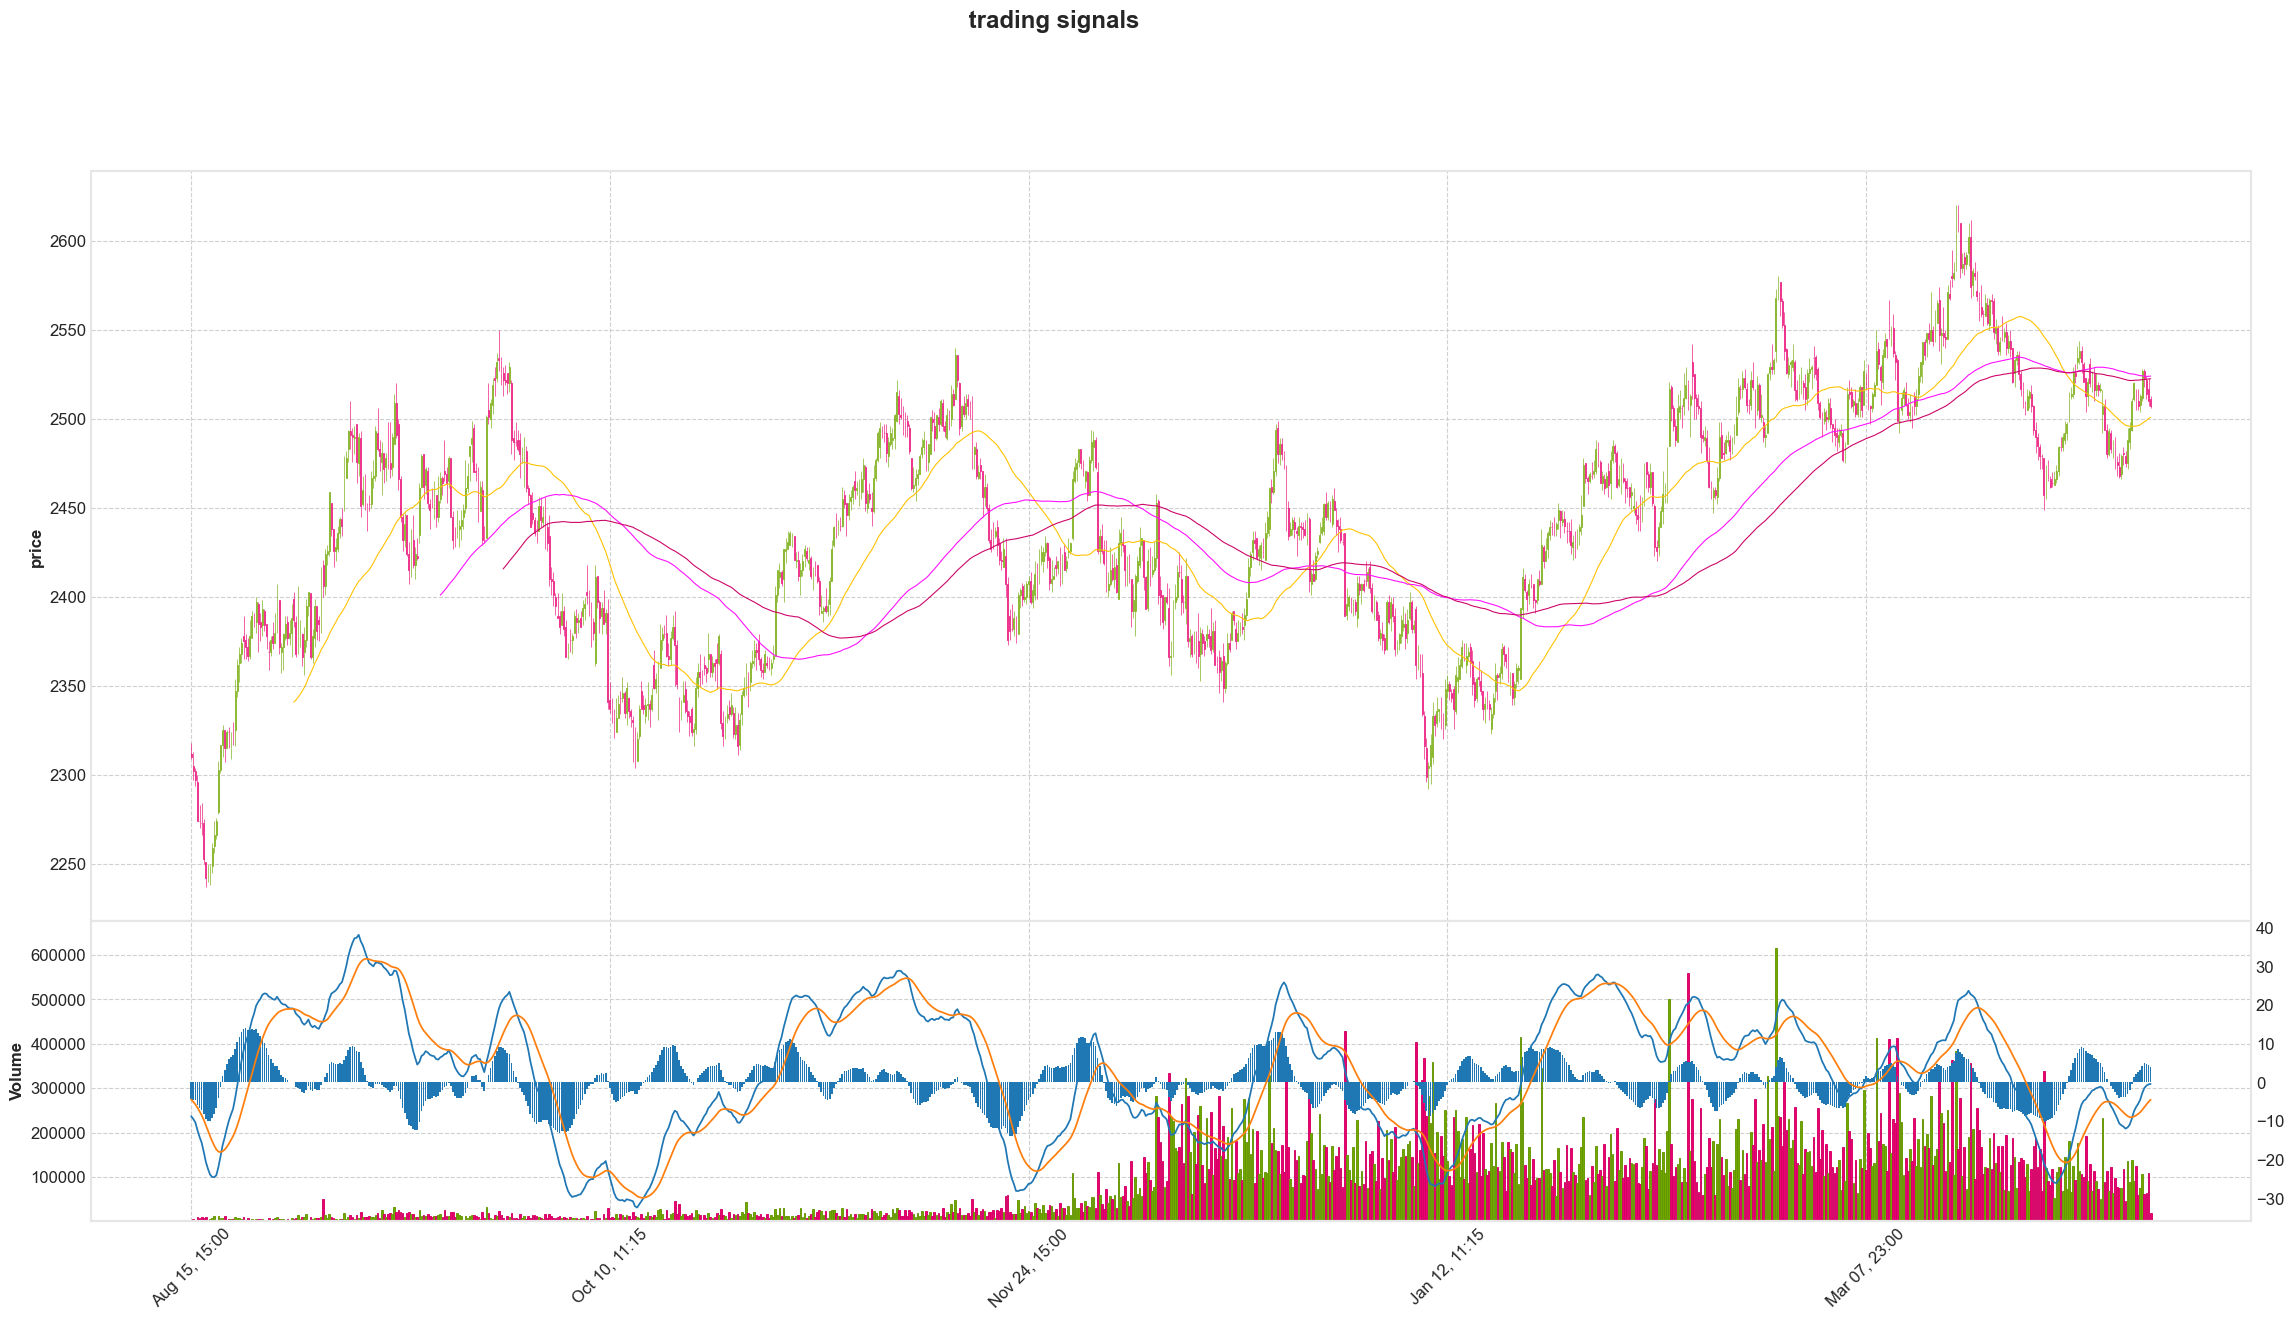

In [7]:
import matplotlib.pyplot as plt

def plot_f(df, name=""):
    import mplfinance as mpf

    df["datetime"] = pd.to_datetime(df["datetime"])
    df.set_index("datetime", inplace=True)

    apd = [
        mpf.make_addplot(df["macd"], panel=1, secondary_y=True),
        mpf.make_addplot(df["macd_signal"], panel=1, secondary_y=True),
        mpf.make_addplot(df["macd_hist"], panel=1, type="bar", secondary_y=True)
    ]

    mpf.plot(
        data=df,
        type="candle",
        title=f"{name} trading signals",
        ylabel="price",
        style="binance",
        volume=True,
        mav=(50, 120, 150),
        tight_layout=False, 
        figsize=(30, 15),
        addplot=apd,
        warn_too_much_data=10000
    )

plot_f(copy.deepcopy(df))

In [8]:
def get_macd_stat(df):
    left, right = 0,0
    macd_values = df["macd"].values

    macd_pos_period, macd_neg_period = [],[]
    while right < len(macd_values)-1:
        while (macd_values[right] *  macd_values[left] > 0) and right < len(macd_values)-1:
            right += 1
        if macd_values[left] < 0:
            macd_neg_period.append(right-left)
        else:
            macd_pos_period.append(right-left)
        # print("macd hist {} 0, count {}".format(">" if macd_values[left] > 0 else "<", right-left))
        left = right

    print("macd neg period: ", macd_neg_period)
    print("macd pos period: ", macd_pos_period)
    
    print("macd neg period mean: ", np.mean(macd_neg_period))
    print("macd neg period std: ", np.std(macd_neg_period))
    print("macd neg period percentile: ", np.percentile(macd_neg_period, [25,50,75,90]))

    print("macd pos period mean: ", np.mean(macd_pos_period))
    print("macd pos period std: ", np.std(macd_pos_period))
    print("macd pos period percentile: ", np.percentile(macd_pos_period, [25,50,75,90]))


# pvc

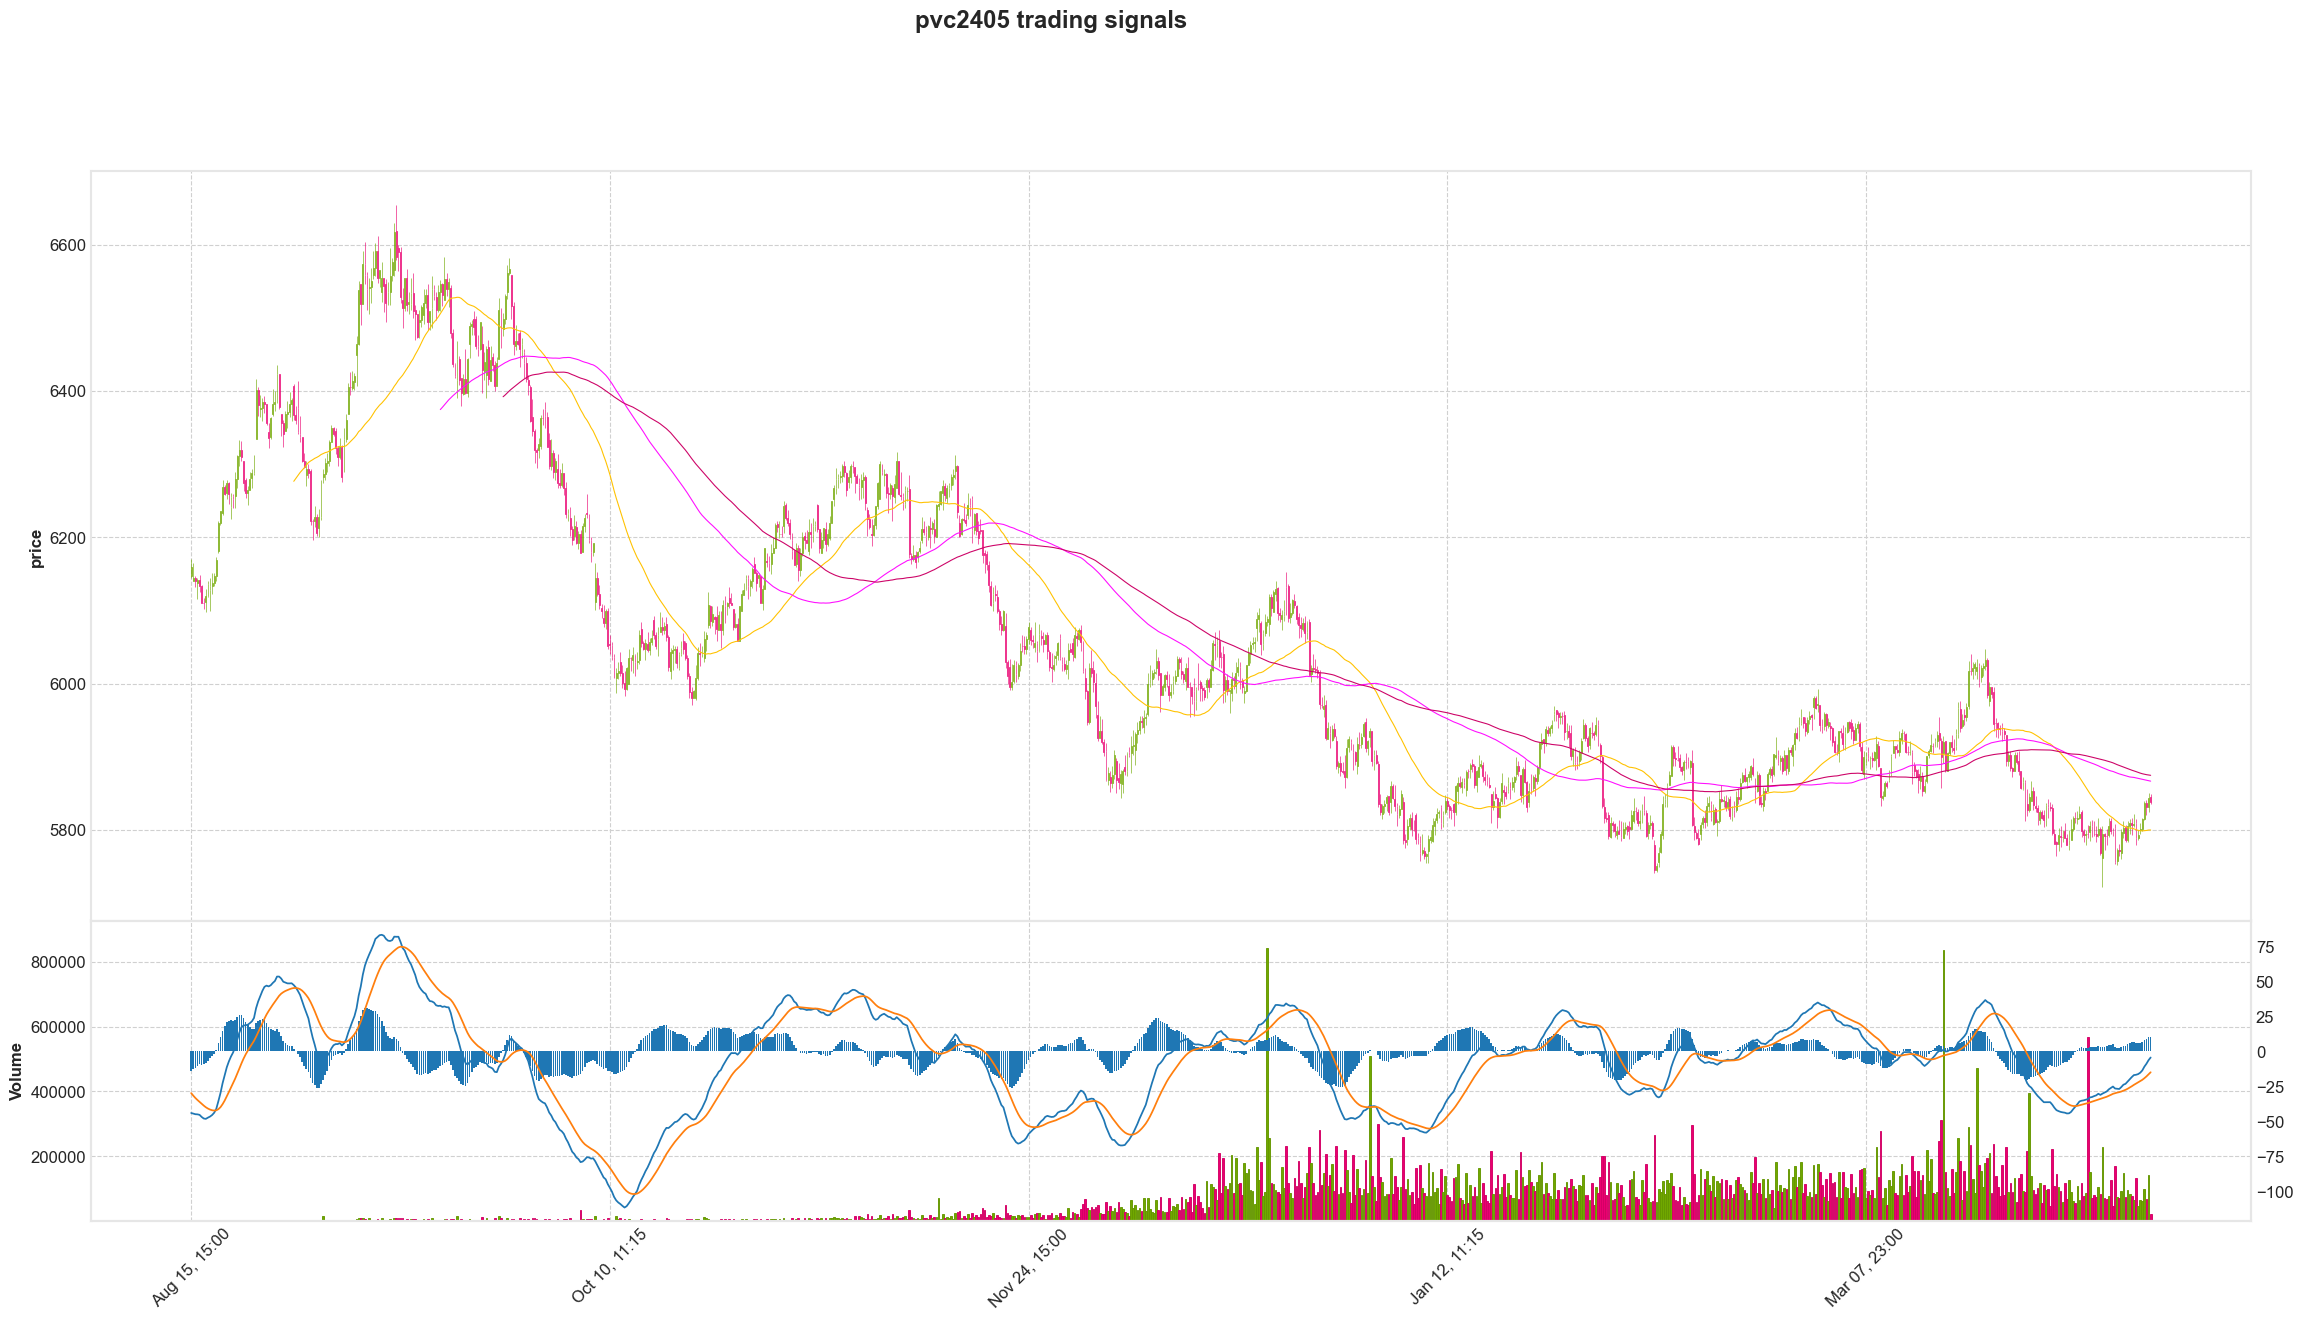

macd neg period:  [21, 7, 21, 104, 13, 94, 76, 9, 34, 22, 28, 1, 66]
macd pos period:  [39, 63, 8, 83, 16, 70, 8, 44, 9, 66, 3, 31]
macd neg period mean:  38.15384615384615
macd neg period std:  33.357841089167884
macd neg period percentile:  [13.  22.  66.  90.4]
macd pos period mean:  36.666666666666664
macd pos period std:  27.1917062518866
macd pos period percentile:  [ 8.75 35.   63.75 69.6 ]


In [9]:
df = get_data(symbol="v2405")
plot_f(copy.deepcopy(df), name="pvc2405")
get_macd_stat(df)

In [10]:
df = get_data(symbol="pp2405")
plot_f(copy.deepcopy(df), name="pp2405")
get_macd_stat(df)

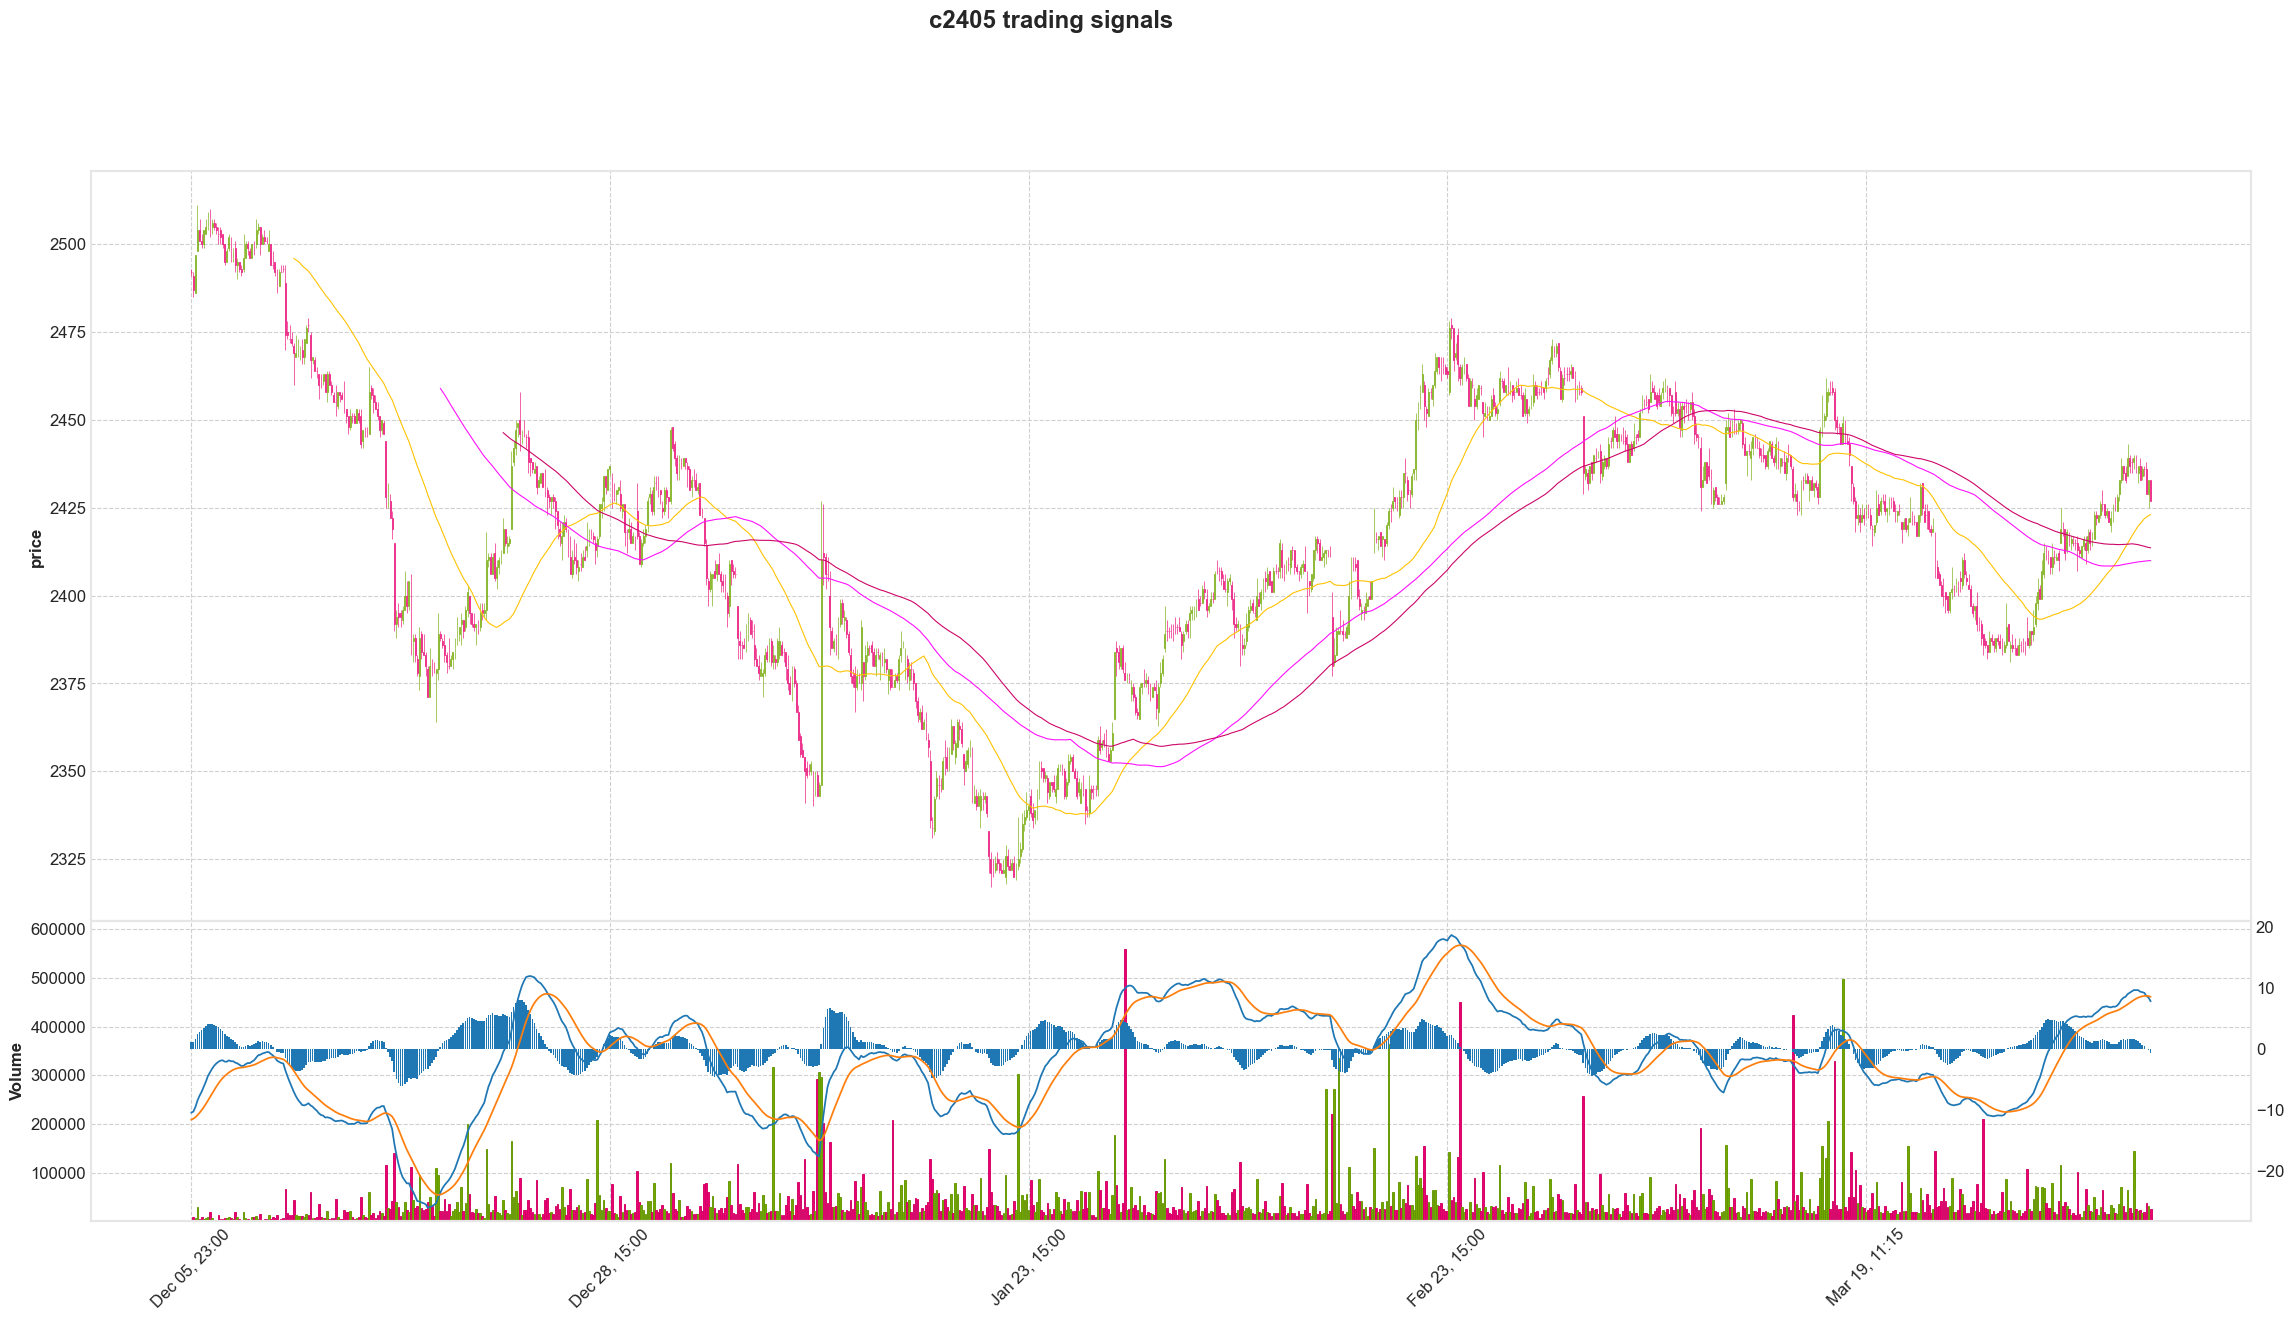

macd neg period:  [150, 13, 5, 65, 100, 16, 32, 61, 93]
macd pos period:  [34, 17, 28, 3, 134, 101, 22, 14, 48]
macd neg period mean:  59.44444444444444
macd neg period std:  45.6632872499247
macd neg period percentile:  [ 16.  61.  93. 110.]
macd pos period mean:  44.55555555555556
macd pos period std:  41.51602397765928
macd pos period percentile:  [ 17.   28.   48.  107.6]


In [ ]:
df = get_data(symbol="c2405")
plot_f(copy.deepcopy(df), name="c2405")
get_macd_stat(df)

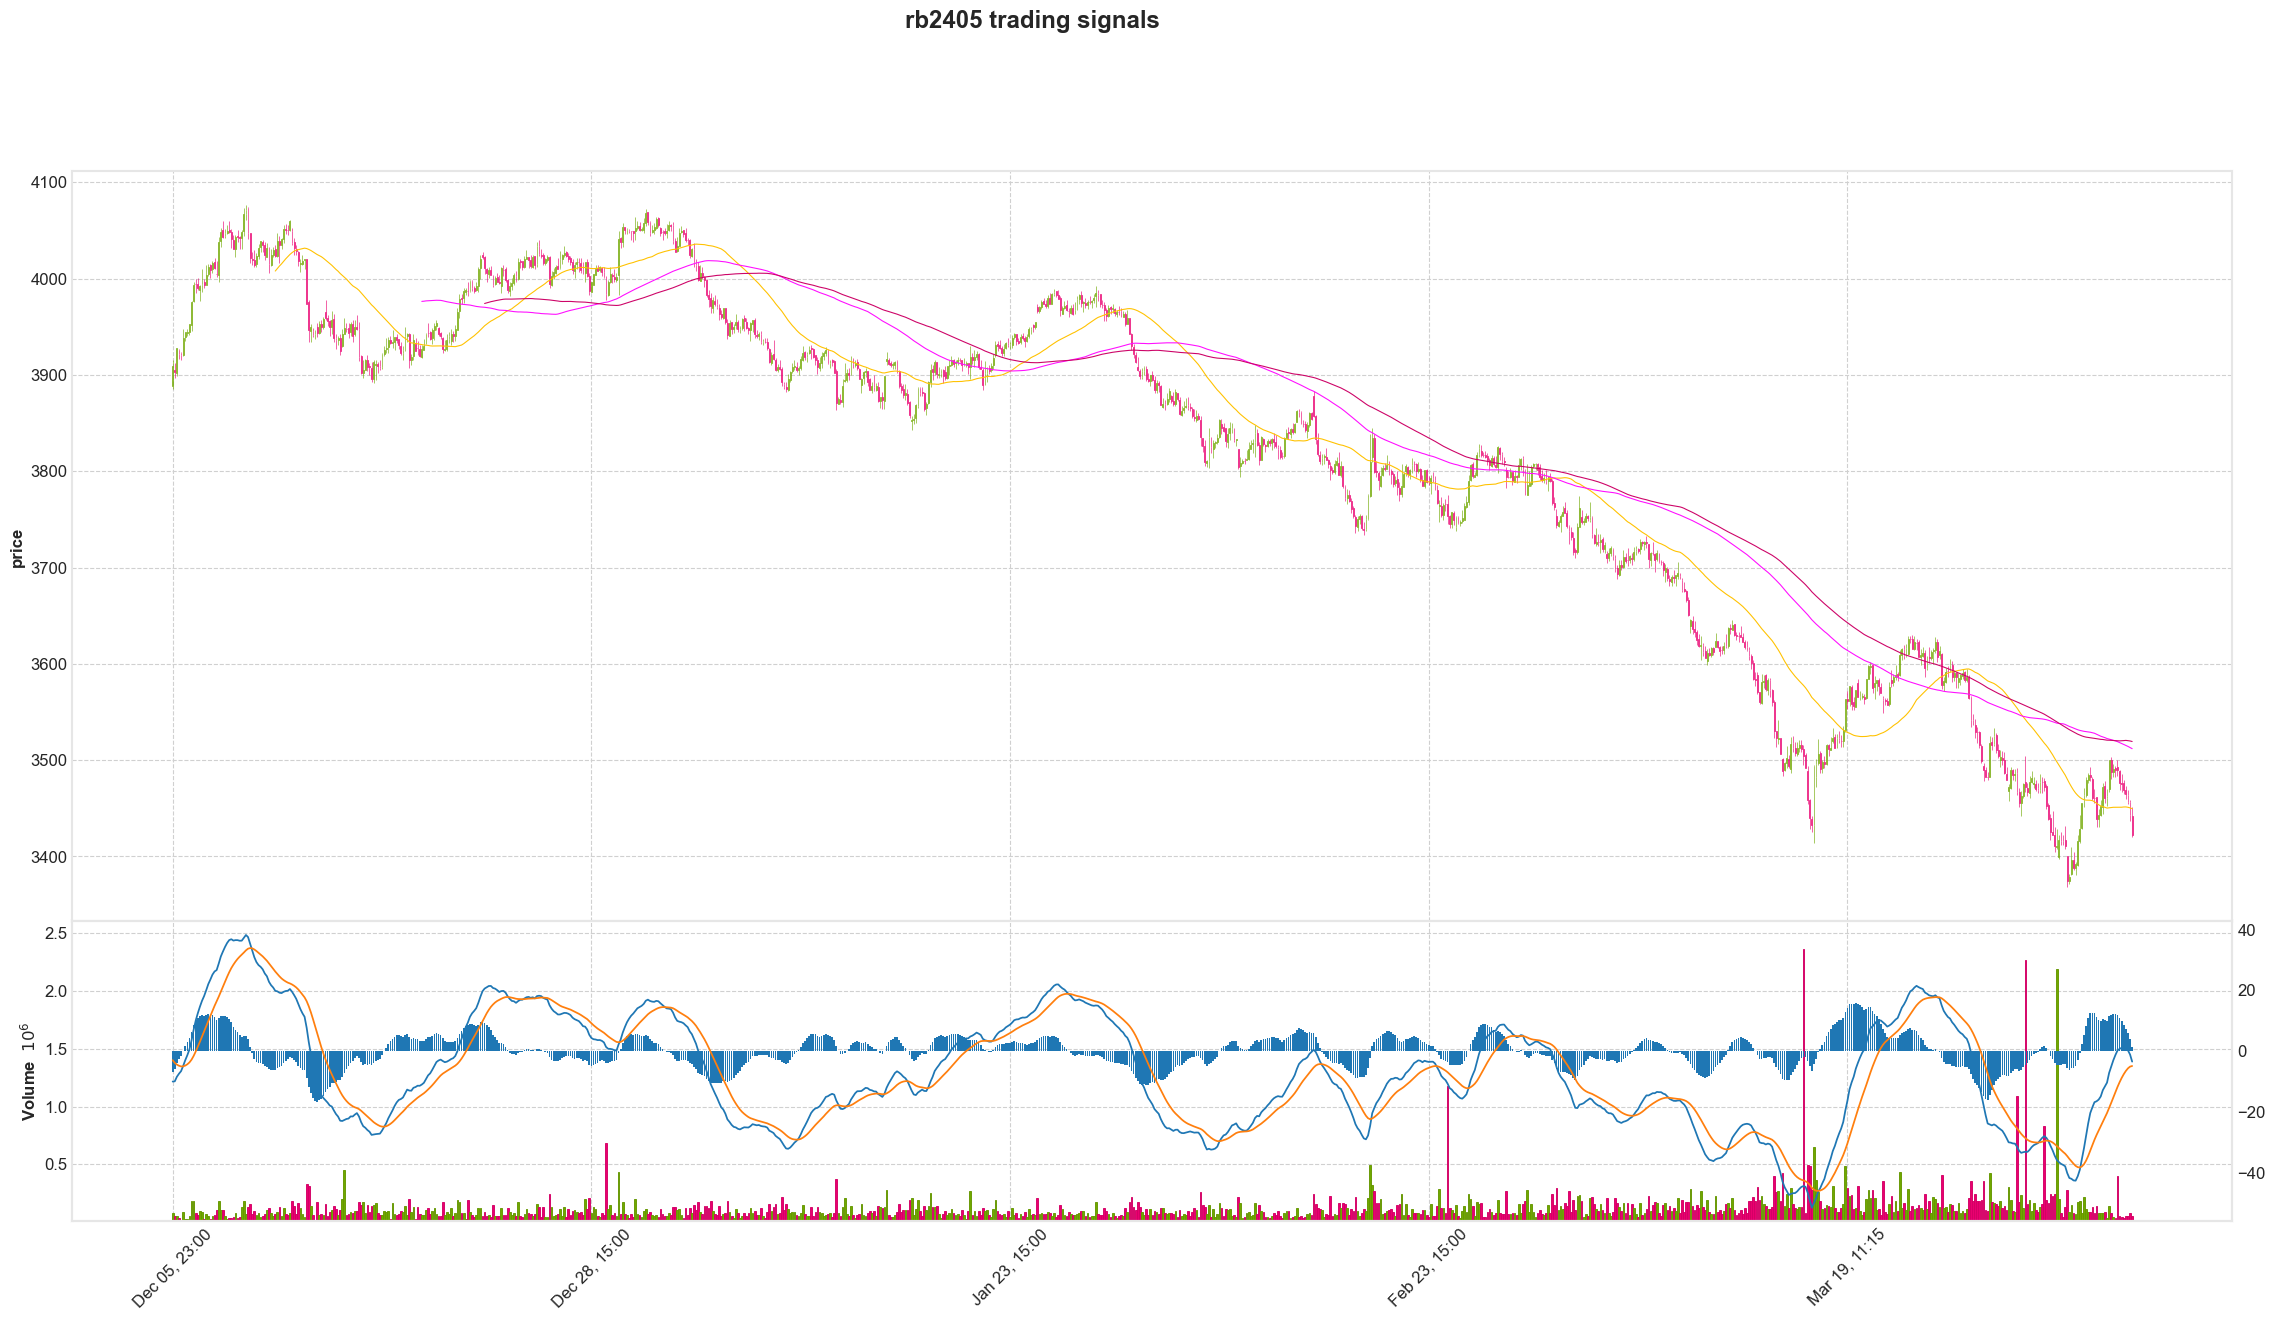

macd neg period:  [8, 71, 120, 86, 79, 149, 70, 1]
macd pos period:  [58, 115, 87, 1, 34, 51, 6]
macd neg period mean:  73.0
macd neg period std:  46.92014492731241
macd neg period percentile:  [ 54.5  75.   94.5 128.7]
macd pos period mean:  50.285714285714285
macd pos period std:  38.268652914864504
macd pos period percentile:  [20.  51.  72.5 98.2]


In [41]:
df = get_data(symbol="rb2405")
plot_f(copy.deepcopy(df), name="rb2405")
get_macd_stat(df)